# **The frist several cells are for Google Colab only**
It is used to link to your folder on Google Drive; To run the following command, remove the hashtages at teh beginning of the command lines 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the directory to your folder on Google Drive

In [2]:
cd '/content/drive/My Drive/Colab Notebooks/MKTG6010'

/content/drive/My Drive/Colab Notebooks/MKTG6010


In [3]:
## display the directory
!pwd

/content/drive/My Drive/Colab Notebooks/MKTG6010


# **Starting from now, the codes are for either Jupyter or Google Colab**

## Get started with Networkx
- Install and initialize Networkx
- Draw network graphs 
- Generate the network density
- Generate the shortest path between "Joseph Wyeth" and "Gervase Benson"
- Generate the centrality measures

### Install and initialize Networkx

In [1]:
!pip install networkx

In [2]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.

In [3]:
# Open the csv file and read the data into a list (not dataframe, so we are not going to use pandas)

with open('D:/WORK/Fiver/Ldgs/04/part 1/network_nodelist.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('D:/WORK/Fiver/Ldgs/04/part 1/network_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [4]:
print(len(node_names)) # num of nodes
print(len(edges)) # num of edges

119
174


In [5]:
nodes

[['William Edmundson', '5', 'male', '20'],
 ['Sarah Cheevers', '6', 'female', '21'],
 ['Joseph Wyeth', '7', 'male', '22'],
 ['Edward Pyott', '8', 'male', '22'],
 ['Alexander Skene of Newtyle', '9', 'male', '23'],
 ['Daniel Quare', '10', 'male', '23'],
 ['James Logan', '5', 'male', '24'],
 ['John Penington', '6', 'male', '24'],
 ['Dorcas Erbery', '7', 'female', '25'],
 ['John Wilkinson', '8', 'male', '25'],
 ['Mary Penington', '9', 'female', '25'],
 ['Lilias Skene', '10', 'male', '26'],
 ['Thomas Aldam', '11', 'male', '26'],
 ['Charles Marshall', '3', 'male', '26'],
 ['William Mucklow', '4', 'male', '27'],
 ['David Barclay of Ury', '5', 'male', '27'],
 ['Humphrey Woolrich', '6', 'male', '27'],
 ['Thomas Salthouse', '7', 'male', '28'],
 ['David Barclay', '8', 'male', '28'],
 ['William Penn', '9', 'male', '28'],
 ['William Dewsbury', '10', 'male', '29'],
 ['Sir Charles Wager', '11', 'male', '29'],
 ['Mary Pennyman', '12', 'female', '29'],
 ['John Story', '13', 'male', '29'],
 ['John Audla

In [6]:
node_names

['William Edmundson',
 'Sarah Cheevers',
 'Joseph Wyeth',
 'Edward Pyott',
 'Alexander Skene of Newtyle',
 'Daniel Quare',
 'James Logan',
 'John Penington',
 'Dorcas Erbery',
 'John Wilkinson',
 'Mary Penington',
 'Lilias Skene',
 'Thomas Aldam',
 'Charles Marshall',
 'William Mucklow',
 'David Barclay of Ury',
 'Humphrey Woolrich',
 'Thomas Salthouse',
 'David Barclay',
 'William Penn',
 'William Dewsbury',
 'Sir Charles Wager',
 'Mary Pennyman',
 'John Story',
 'John Audland',
 'George Keith',
 'Dorothy Waugh',
 'Thomas Story',
 'Richard Claridge',
 'James Parnel',
 'Francis Bugg',
 'David Lloyd',
 'Thomas Ellwood',
 'William Bradford',
 'Peter Collinson',
 'Sarah Gibbons',
 'Lewis Morris',
 'William Simpson',
 'Fettiplace Bellers',
 'Samuel Clarridge',
 'Thomas Lower',
 'Gervase Benson',
 'Stephen Crisp',
 'James Claypoole',
 'Thomas Holme',
 'John Freame',
 'John Swinton',
 'William Mead',
 'Henry Pickworth',
 'John Crook',
 'Gilbert Latey',
 'Ellis Hookes',
 'Joseph Besse',
 'Fra

In [7]:
edges

[('George Keith', 'Robert Barclay'),
 ('George Keith', 'Benjamin Furly'),
 ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
 ('George Keith', 'Franciscus Mercurius van Helmont'),
 ('George Keith', 'William Penn'),
 ('George Keith', 'George Fox'),
 ('George Keith', 'George Whitehead'),
 ('George Keith', 'William Bradford'),
 ('James Parnel', 'Benjamin Furly'),
 ('James Parnel', 'Stephen Crisp'),
 ('Peter Collinson', 'John Bartram'),
 ('Peter Collinson', 'James Logan'),
 ('Joseph Wyeth', 'Thomas Ellwood'),
 ('Alexander Skene of Newtyle', 'Lilias Skene'),
 ('Dorcas Erbery', 'James Nayler'),
 ('William Mucklow', 'George Fox'),
 ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
 ('William Dewsbury', 'Edward Burrough'),
 ('William Dewsbury', 'George Fox'),
 ('William Dewsbury', 'John Crook'),
 ('John Audland', 'John Camm'),
 ('John Audland', 'Francis Howgill'),
 ('John Audland', 'Edward Pyott'),
 ('John Audland', 'Charles Marshall'),
 ('John Audland', 'George Fox'),
 

### Draw network graph

In [8]:
G = nx.Graph()

In [9]:
G.add_nodes_from(node_names)
G.add_edges_from(edges)

In [10]:
# Show what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

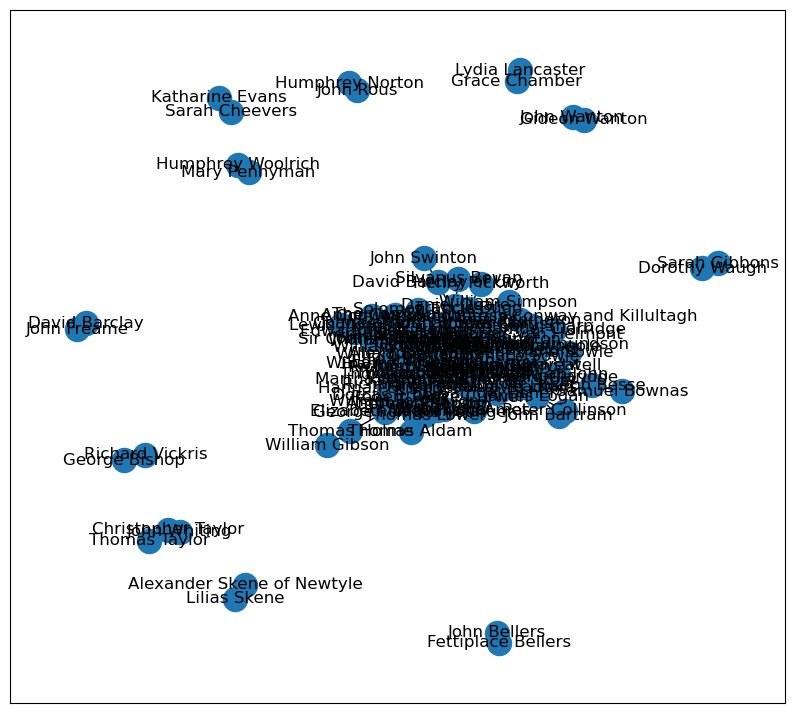

In [11]:
 # draw the graph using the default spring layout
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

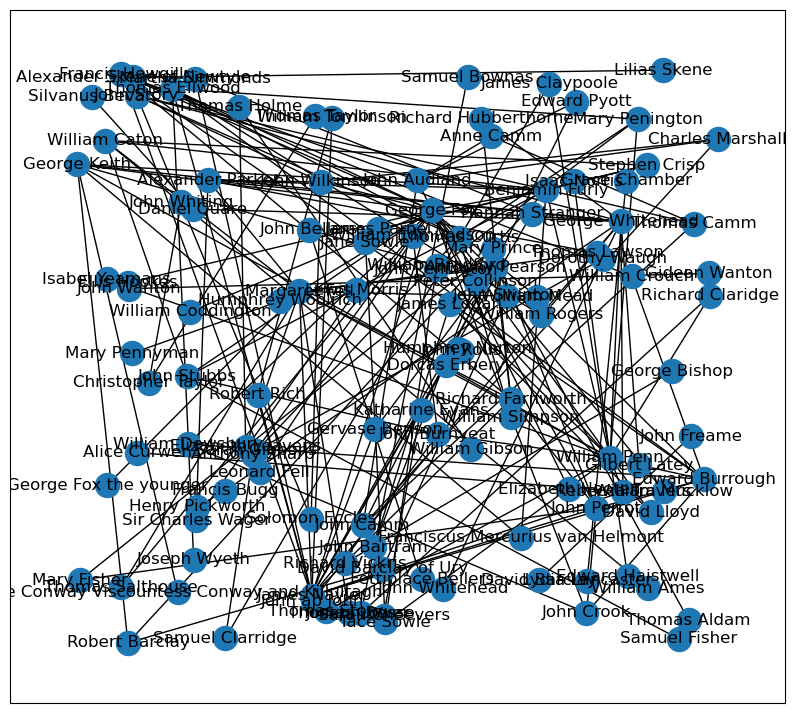

In [12]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

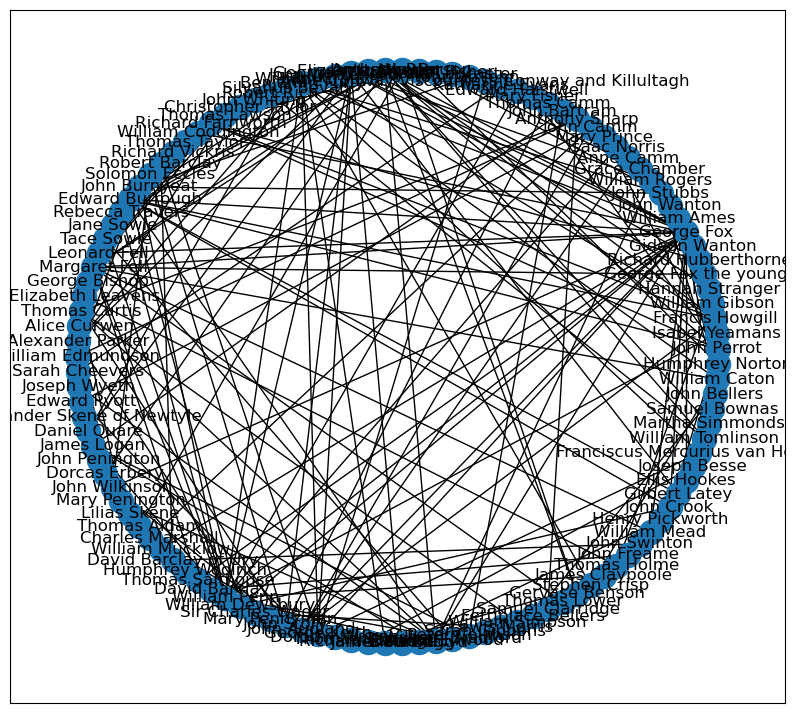

In [13]:
# Draw the graph using the shell layout
plt.figure(figsize=(10,9))
pos = nx.shell_layout(G)
nx.draw_networkx(G, pos)

#### Save nodes' attributes, using dict

In [14]:
# Create an empty dictionary for each attribute
user_dict = {}
gender_dict = {}
age_dict = {}


for node in nodes: # Loop through the list of nodes, one row at a time
    user_dict[node[0]] = node[1] # Access the correct item, add it to the corresponding dictionary
    gender_dict[node[0]] = node[2]
    age_dict[node[0]] = node[3]


# Add each dictionary as a node attribute to the Graph object
nx.set_node_attributes(G, user_dict, 'user_years')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, age_dict, 'age')


# Loop through each node, to access and print all the "birth_year" attributes
for n in G.nodes():
    print(n, G.nodes[n]['age'])

William Edmundson 20
Sarah Cheevers 21
Joseph Wyeth 22
Edward Pyott 22
Alexander Skene of Newtyle 23
Daniel Quare 23
James Logan 24
John Penington 24
Dorcas Erbery 25
John Wilkinson 25
Mary Penington 25
Lilias Skene 26
Thomas Aldam 26
Charles Marshall 26
William Mucklow 27
David Barclay of Ury 27
Humphrey Woolrich 27
Thomas Salthouse 28
David Barclay 28
William Penn 28
William Dewsbury 29
Sir Charles Wager 29
Mary Pennyman 29
John Story 29
John Audland 30
George Keith 30
Dorothy Waugh 30
Thomas Story 30
Richard Claridge 31
James Parnel 31
Francis Bugg 31
David Lloyd 31
Thomas Ellwood 31
William Bradford 32
Peter Collinson 32
Sarah Gibbons 32
Lewis Morris 32
William Simpson 32
Fettiplace Bellers 33
Samuel Clarridge 33
Thomas Lower 33
Gervase Benson 33
Stephen Crisp 33
James Claypoole 33
Thomas Holme 33
John Freame 33
John Swinton 33
William Mead 33
Henry Pickworth 33
John Crook 33
Gilbert Latey 33
Ellis Hookes 33
Joseph Besse 33
Franciscus Mercurius van Helmont 33
William Tomlinson 33
M

### Generate the network density

In [15]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


### Generate the shortest path between "Joseph Wyeth" and "Gervase Benson"

Change the source to 'Joseph Wyeth' and target to 'Gervase Benson' then find the shortest path.

In [16]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [17]:
print("Length of that path:", len(fell_whitehead_path)-1)

Length of that path: 2


### Generate the centrality measures
- Degree centrality
- Eigenvector centrality
- Closeness centrality
- Betweenness centrality

#### Degree Centrality

In [18]:
# using dict to save the value of degree centrality for each node
degree_dict = dict(G.degree(G.nodes()))

# using set_node_attributes to set the value of degree centrality in each node, and named 'degree'
nx.set_node_attributes(G, degree_dict, 'degree')

In [19]:
print(G.nodes['William Penn'])

{'user_years': '9', 'gender': 'male', 'age': '28', 'degree': 18}


In [20]:
# sort the degree_dict by descending

sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [21]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('John Perrot', 7)
('Francis Howgill', 7)
('John Story', 6)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Wilkinson', 5)
('William Caton', 5)
('John Stubbs', 5)
('Anthony Pearson', 5)
('Thomas Curtis', 5)


#### Betweenness, Eigenvector, and Closeness Centrality

In [24]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
closeness_dict = nx.closeness_centrality(G) # Run closeness centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
nx.set_node_attributes(G, closeness_dict, 'closeness')


##### Betweenness Centrality

In [25]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('William Penn', 0.2399945600619219)
('George Fox', 0.23683257726065207)
('George Whitehead', 0.12632024847366008)
('Margaret Fell', 0.12106792237170333)
('James Nayler', 0.104460262804461)
('Benjamin Furly', 0.06419626175167244)
('Thomas Ellwood', 0.04619062388510455)
('George Keith', 0.04500656400917156)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.028295668549905836)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.02672975172975173)
('John Stubbs', 0.024316593960227163)
('Mary Penington', 0.02420824624214455)


In [26]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: William Penn | Betweenness Centrality: 0.2399945600619219 | Degree: 18
Name: George Fox | Betweenness Centrality: 0.23683257726065207 | Degree: 22
Name: George Whitehead | Betweenness Centrality: 0.12632024847366008 | Degree: 13
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170333 | Degree: 13
Name: James Nayler | Betweenness Centrality: 0.104460262804461 | Degree: 16
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167244 | Degree: 10
Name: Thomas Ellwood | Betweenness Centrality: 0.04619062388510455 | Degree: 8
Name: George Keith | Betweenness Centrality: 0.04500656400917156 | Degree: 8
Name: John Audland | Betweenness Centrality: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness Centrality: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness Centrality: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness Centrality: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness Centrality: 0.028295668549905

##### Eigenvector Centrality

In [27]:
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by eigenvector centrality:")
for b in sorted_eigenvector[:20]:
    print(b)

Top 20 nodes by eigenvector centrality:
('George Fox', 0.44917507108599225)
('James Nayler', 0.33529741004478664)
('William Penn', 0.2703220115399867)
('Margaret Fell', 0.25317094990568095)
('George Whitehead', 0.24974553349141954)
('Edward Burrough', 0.23147427604862297)
('Francis Howgill', 0.19095393782681047)
('Benjamin Furly', 0.18785206346916505)
('John Perrot', 0.18496928077956107)
('George Keith', 0.18384690867915343)
('Thomas Ellwood', 0.17608142535843854)
('Richard Farnworth', 0.15368535029296415)
('John Crook', 0.13271581268807786)
('Rebecca Travers', 0.11848040644650927)
('Alexander Parker', 0.11587808682088321)
('Anthony Pearson', 0.11120476725256782)
('William Dewsbury', 0.11057869321157118)
('John Stubbs', 0.10693500692141822)
('John Audland', 0.09830889719333749)
('Thomas Salthouse', 0.09548628544138768)


##### Closeness Centrality

In [28]:
sorted_closeness = sorted(closeness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by closeness centrality:")
for b in sorted_closeness[:20]:
    print(b)

Top 20 nodes by closeness centrality:
('George Fox', 0.39222077357670576)
('William Penn', 0.3730880529144274)
('George Whitehead', 0.3540881983678594)
('Margaret Fell', 0.33842057897105143)
('James Nayler', 0.3310954582141023)
('George Keith', 0.3254597908402452)
('Benjamin Furly', 0.3213573565019228)
('Thomas Ellwood', 0.30230454880418034)
('Edward Burrough', 0.29759941963991293)
('Rebecca Travers', 0.29759941963991293)
('Francis Howgill', 0.2897085259373395)
('Alexander Parker', 0.2886152862168212)
('John Stubbs', 0.28753026634382567)
('John Perrot', 0.28645337396051546)
('John Wilkinson', 0.2832705586942875)
('Mary Penington', 0.27913522207101327)
('Thomas Salthouse', 0.27913522207101327)
('William Mead', 0.27913522207101327)
('John Audland', 0.2781201848998459)
('Richard Farnworth', 0.2781201848998459)


**Result Interpretation**
...
### Centrality measures
Betweenness centrality is a measure of the importance of a node (in this case, a person) in a network. It quantifies how many shortest paths between all pairs of nodes in the network pass through a particular node. The higher the betweenness centrality of a node, the more important it is in facilitating communication and the flow of information between other nodes in the network.
    

Eigenvector centrality is another measure of node importance in a network, but it takes into account not only the number of connections a node has but also the quality of those connections. A node with high eigenvector centrality is one that is connected to many other important nodes.
    Looking at the top 20 nodes by eigenvector centrality in this network, we see that George Fox is once again at the top of 
    the list. This suggests that Fox not only had many connections within the network but was also connected to other 
    influential people outside of the network.

Closeness centrality is another measure of node importance in a network. It measures the average length of the shortest path between a node and all other nodes in the network. A node with high closeness centrality is one that is close to many other nodes in the network and can easily reach other nodes.
    The top two nodes, George Fox and William Penn are the two most important node as they have the max amount of closeness 
    centrality.


In [36]:
#degree centrality
# calculate the degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# print the degree centrality for each node
for node, dc in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {dc}")

Node William Edmundson: Degree Centrality = 0.01694915254237288
Node Sarah Cheevers: Degree Centrality = 0.00847457627118644
Node Joseph Wyeth: Degree Centrality = 0.00847457627118644
Node Edward Pyott: Degree Centrality = 0.01694915254237288
Node Alexander Skene of Newtyle: Degree Centrality = 0.00847457627118644
Node Daniel Quare: Degree Centrality = 0.01694915254237288
Node James Logan: Degree Centrality = 0.03389830508474576
Node John Penington: Degree Centrality = 0.00847457627118644
Node Dorcas Erbery: Degree Centrality = 0.00847457627118644
Node John Wilkinson: Degree Centrality = 0.0423728813559322
Node Mary Penington: Degree Centrality = 0.03389830508474576
Node Lilias Skene: Degree Centrality = 0.00847457627118644
Node Thomas Aldam: Degree Centrality = 0.00847457627118644
Node Charles Marshall: Degree Centrality = 0.025423728813559324
Node William Mucklow: Degree Centrality = 0.00847457627118644
Node David Barclay of Ury: Degree Centrality = 0.01694915254237288
Node Humphrey 

**Result Interpretation**
### part 2
Based on the analysis of the network, if the message needs to be forwarded to multiple users simultaneously and its travel distance is limited to one step, the most effective approach would be to choose the node with the highest degree centrality. In this case, "William Penn" has the highest degree centrality, indicating that he is the most connected node in the network. By selecting William Penn as the forwarding node, the message has the highest probability of reaching the maximum number of individuals in the network within one step.

### part 3
To achieve the lowest average number of hops, we need to select the node that has the highest betweenness centrality. Based on our network analysis, William Penn has the highest betweenness centrality, which implies that he plays a crucial role in bridging the communication gap between various nodes in the network. This is due to the fact that William Penn is located in a central position and serves as a hub that connects different clusters of nodes. Therefore, selecting William Penn to deliver the message would ensure the lowest average number of hops required for the message to reach all nodes in the network.


...

#### Drawing a customized graph to highlight some important nodes

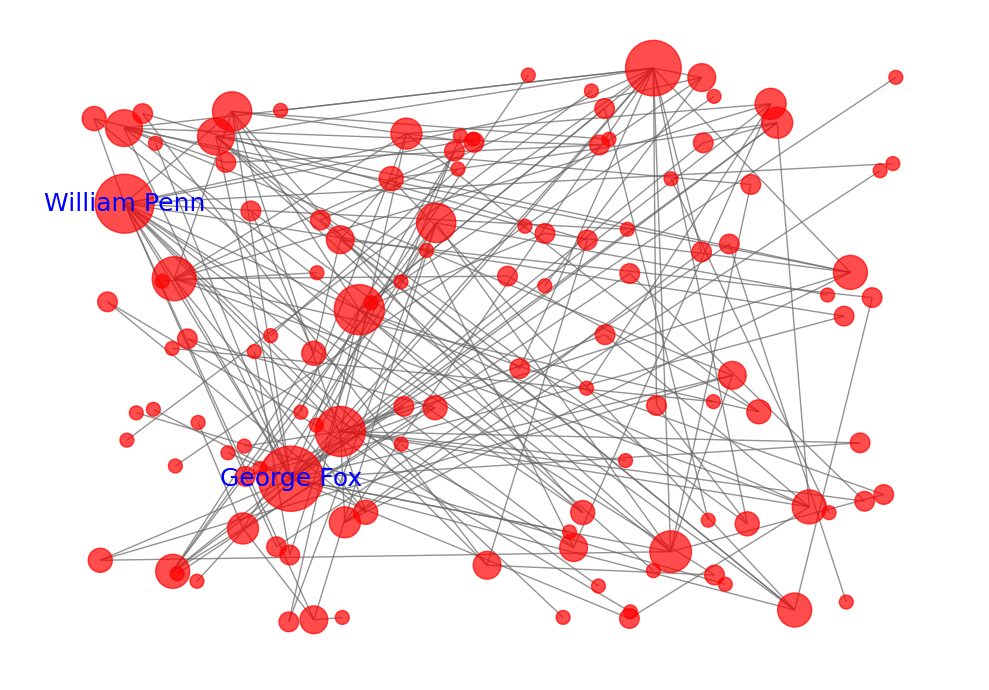

In [29]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))
pos = nx.random_layout(G) # set random_layout

# weight node size by degree centrality
node_size = [100*nx.get_node_attributes(G, 'degree')[v] for v in G]

# customized settings
nx.draw_networkx(G, pos, alpha=0.7, with_labels=False,node_size = node_size, edge_color='.4',node_color='red')

#d = nx.degree(G)
nx.draw_networkx_labels(G, pos, labels={'George Fox': 'George Fox', 'William Penn': 'William Penn'}, font_size=18, font_color='blue')
plt.axis('off')
plt.tight_layout();

## Community detection with modularity

In [30]:
# Find communities in G using greedy modularity maximization
communities = community.greedy_modularity_communities(G)

In [31]:
communities

[frozenset({'Anne Conway Viscountess Conway and Killultagh',
            'David Lloyd',
            'Edward Haistwell',
            'George Keith',
            'Isaac Norris',
            'Isabel Yeamans',
            'James Logan',
            'Jane Sowle',
            'John Bartram',
            'Joseph Besse',
            'Peter Collinson',
            'Richard Claridge',
            'Samuel Bownas',
            'Tace Sowle',
            'Thomas Story',
            'William Bradford',
            'William Penn'}),
 frozenset({'Anthony Pearson',
            'Dorcas Erbery',
            'Elizabeth Leavens',
            'Francis Howgill',
            'George Fox the younger',
            'Gervase Benson',
            'Hannah Stranger',
            'James Nayler',
            'Margaret Fell',
            'Martha Simmonds',
            'Richard Farnworth',
            'Robert Rich',
            'Thomas Aldam',
            'Thomas Holme',
            'Thomas Lower',
            'William G

#### Create a dict for people to store which class they belong to

In [32]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [33]:
modularity_dict

{'Peter Collinson': 0,
 'David Lloyd': 0,
 'Tace Sowle': 0,
 'Joseph Besse': 0,
 'Isabel Yeamans': 0,
 'Thomas Story': 0,
 'George Keith': 0,
 'James Logan': 0,
 'Samuel Bownas': 0,
 'John Bartram': 0,
 'Edward Haistwell': 0,
 'Isaac Norris': 0,
 'Anne Conway Viscountess Conway and Killultagh': 0,
 'Richard Claridge': 0,
 'William Bradford': 0,
 'Jane Sowle': 0,
 'William Penn': 0,
 'James Nayler': 1,
 'William Gibson': 1,
 'Thomas Aldam': 1,
 'Hannah Stranger': 1,
 'Thomas Holme': 1,
 'George Fox the younger': 1,
 'Richard Farnworth': 1,
 'Francis Howgill': 1,
 'William Tomlinson': 1,
 'Thomas Lower': 1,
 'Robert Rich': 1,
 'Elizabeth Leavens': 1,
 'Margaret Fell': 1,
 'Anthony Pearson': 1,
 'Gervase Benson': 1,
 'Martha Simmonds': 1,
 'Dorcas Erbery': 1,
 'William Coddington': 2,
 'Ellis Hookes': 2,
 'William Dewsbury': 2,
 'William Crouch': 2,
 'Elizabeth Hooten': 2,
 'Mary Prince': 2,
 'Edward Burrough': 2,
 'William Mucklow': 2,
 'William Mead': 2,
 'Mary Fisher': 2,
 'Leonard Fel

#### Show the people of the top 5 eigenvectors in Class 0

In [34]:
# First get a list of the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: William Penn | Eigenvector Centrality: 0.2703220115399867
Name: George Keith | Eigenvector Centrality: 0.18384690867915343
Name: William Bradford | Eigenvector Centrality: 0.06812170326615952
Name: Tace Sowle | Eigenvector Centrality: 0.04688085927497435
Name: James Logan | Eigenvector Centrality: 0.04447446026748655


#### Show people in each Class, filtering out classes with 2 or fewer nodes

In [35]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['Peter Collinson', 'David Lloyd', 'Tace Sowle', 'Joseph Besse', 'Isabel Yeamans', 'Thomas Story', 'George Keith', 'James Logan', 'Samuel Bownas', 'John Bartram', 'Edward Haistwell', 'Isaac Norris', 'Anne Conway Viscountess Conway and Killultagh', 'Richard Claridge', 'William Bradford', 'Jane Sowle', 'William Penn']
Class 1: ['James Nayler', 'William Gibson', 'Thomas Aldam', 'Hannah Stranger', 'Thomas Holme', 'George Fox the younger', 'Richard Farnworth', 'Francis Howgill', 'William Tomlinson', 'Thomas Lower', 'Robert Rich', 'Elizabeth Leavens', 'Margaret Fell', 'Anthony Pearson', 'Gervase Benson', 'Martha Simmonds', 'Dorcas Erbery']
Class 2: ['William Coddington', 'Ellis Hookes', 'William Dewsbury', 'William Crouch', 'Elizabeth Hooten', 'Mary Prince', 'Edward Burrough', 'William Mucklow', 'William Mead', 'Mary Fisher', 'Leonard Fell', 'Thomas Salthouse', 'George Fox', 'John Perrot', 'John Crook']
Class 3: ['Henry Pickworth', 'Daniel Quare', 'Rebecca Travers', 'Thomas Lawson',

**Result Interpretation**
### part 4 
Based on the network analysis, it is likely that individuals who are in the same community as Rebecca Travers, such as Daniel Quare and Alice Curwen, would be interested in an advertisement featuring Ang Lee. This is because individuals in the same community are more likely to share similar interests and preferences. Therefore, targeting individuals in the same community as Rebecca Travers could be an effective strategy to reach a relevant audience for the advertisement.
...